## Fetching Dataset 

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
x,y=mnist['data'],mnist['target']

In [5]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
%matplotlib inline  

In [9]:
#iska mtlb h plot krna plots ko yhi pr

In [10]:
import matplotlib
import matplotlib.pyplot as plt

In [11]:
import numpy as np
x=np.array(x)
some_digit=x[36000]
some_digit_image=some_digit.reshape(28,28)

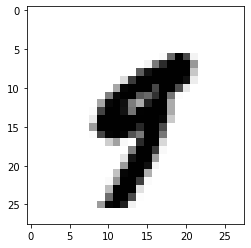

In [12]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")

In [13]:
y[36000]

'9'

In [37]:
x_train,x_test=x[:60000],x[60000:]


In [15]:
y_train,y_test=y[:60000],y[60000:]

In [16]:
shuffle_index=np.random.permutation(60000)
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

## Creating a 2 Detector 

In [17]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [18]:
y_train_2

45068    False
34442     True
6838     False
14384    False
54825    False
         ...  
1255      True
36419    False
23095    False
13493    False
56492    False
Name: class, Length: 60000, dtype: bool

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

In [20]:
# clf=LogisticRegression()
# clf=KNeighborsClassifier()
clf=SGDClassifier()

In [21]:
clf.fit(x_train,y_train_2)

SGDClassifier()

In [22]:
clf.predict([some_digit])

array([False])

In [23]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy") #accuracy matrix le rhe h

In [24]:
a.mean() #evaluating the classifier

0.9677166666666667

In [25]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(clf,x_train,y_train_2,cv=3)

In [26]:
y_train_pred # score jo bhi accuracy aai h usko 0-1 me score deta h,predict 

array([False,  True, False, ..., False, False, False])

# Calculating Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_train_2,y_train_pred)

array([[52559,  1483],
       [  667,  5291]], dtype=int64)

In [29]:
confusion_matrix(y_train_2,y_train_2) # phla actual hota h , 2nd predicted one

array([[54042,     0],
       [    0,  5958]], dtype=int64)

## Precision and Recall

In [30]:
from sklearn.metrics import precision_score,recall_score

In [31]:
precision_score(y_train_2,y_train_pred)

0.7810746973723058

In [32]:
recall_score(y_train_2,y_train_pred)

0.8880496811010407

 ## F1 -Score

In [33]:
from sklearn.metrics import f1_score

In [34]:
f1_score(y_train_2,y_train_pred)

0.8311341501727929

## Precision Recall Curve

In [38]:
from sklearn.metrics import precision_recall_curve

In [39]:
y_scores=cross_val_predict(clf,x_train,y_train_2,cv=3,method="decision_function")

In [40]:
precision,recalls,thresholds=precision_recall_curve(y_train_2,y_scores)

In [41]:
precision 

array([0.0993    , 0.09930166, 0.09930331, ..., 0.5       , 1.        ,
       1.        ])

In [42]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.67841558e-04, 1.67841558e-04, 0.00000000e+00])

In [43]:
thresholds

array([-18684.78029194, -17706.45985553, -17457.29796783, ...,
         4467.61798341,   4988.52178625,   5789.44806449])

## Precision Recall Curve

AttributeError: module 'matplotlib.pyplot' has no attribute 'shot'

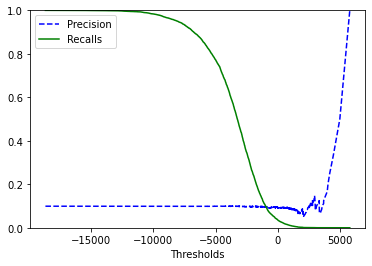

In [44]:
plt.plot(thresholds,precision[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"g-",label="Recalls")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.shot()

In [ ]:
def Checking(x,y):
    print("Precision score:",precision_score(x,y))
    print("\n")
    print("Recall score:",recall_score(x,y))
    print("\n")
    print("F1 score:",f1_score(x,y))

In [ ]:
Checking(y_train_2,y_train_pred)